# Japan Subsite Overview

## Preliminary Preparations

In [1]:
import numpy as np
import pandas as pd

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

import json
import yaml
import ast

import requests
import IPython.display as Disp

from re import findall
import itertools

from datetime import datetime
from datetime import tzinfo

%matplotlib inline
plt.rcParams["figure.figsize"] = [14, 10]

%config Completer.use_jedi = False

print("Imports Done!")

Imports Done!


In [2]:
PATH = "/home/aleksey/PycharmProjects/DTF_database_and_scrapper_config/"

In [3]:
full_japan_df_origin = pd.read_csv(PATH + 'data_test_jp_full_alter.csv', index_col=0)
full_japan_df_origin.reset_index(inplace=True)
full_japan_df_origin.drop(columns=['index'], inplace=True)
full_japan_df_origin.head()

,id,url,author,badges,commentsCount,commentsSeenCount,favoritesCount,cover,date,dateRFC,...,blocks,subscribedToTreads,is_show_thanks,is_still_updating,is_filled_by_editors,isEditorial,audioUrl,hotness,commentEditor,summarize
0,650909,https://dtf.ru/s/travel/650909-10-potryasayush...,"{'id': 329335, 'url': 'https://dtf.ru/s/travel...","[{'type': 'top', 'text': 'Путешествия', 'backg...",3,NaN,9,"{'additionalData': {'size': 182666, 'type': 'j...",1613986578,"Mon, 22 Feb 2021 12:36:18 +0300",...,"[{'type': 'text', 'data': {'text': 'Возможно, ...",False,False,False,False,False,NaN,0,{'enabled': True},Музей открыт ежедневно и находится в постройке...
1,651835,https://dtf.ru/s/weaboo/651835-some-japan,"{'id': 124435, 'url': 'https://dtf.ru/u/124435...","[{'type': 'top', 'text': 'Виабу', 'background'...",6,NaN,8,"{'additionalData': {'size': 1351208, 'type': '...",1614061795,"Tue, 23 Feb 2021 09:29:55 +0300",...,"[{'type': 'text', 'data': {'text': 'Немного по...",False,False,False,False,False,NaN,0,{'enabled': True},"Адрес: 605-4 Mawatari Onuma, Хитачинака 312-00..."
2,646467,https://dtf.ru/u/286845-digo/646467,"{'id': 286845, 'url': 'https://dtf.ru/u/286845...","[{'type': 'top', 'text': 'Digo', 'background':...",19,NaN,16,"{'additionalData': {'size': 890999, 'type': 'j...",1613630419,"Thu, 18 Feb 2021 09:40:19 +0300",...,"[{'type': 'text', 'data': {'text': '\\#наэтотр...",False,False,False,False,False,NaN,0,{'enabled': True},#наэтотразбезhorny #фотография #япония #токио
3,645864,https://dtf.ru/s/japan/645864-sady-hamarikyu,"{'id': 27850, 'url': 'https://dtf.ru/u/27850-d...","[{'type': 'top', 'text': 'Япония', 'background...",0,NaN,13,"{'additionalData': {'size': 283350, 'type': 'j...",1613578168,"Wed, 17 Feb 2021 19:09:28 +0300",...,"[{'type': 'text', 'data': {'text': 'Это райско...",False,False,False,False,False,NaN,0,{'enabled': True},Токийский залив обеспечивает соленой водой ров...
4,634735,https://dtf.ru/anime/634735-v-anime-devushka-n...,"{'id': 256351, 'url': 'https://dtf.ru/crunchyr...","[{'type': 'top', 'text': 'Аниме', 'background'...",928,NaN,771,"{'additionalData': {'size': 86706, 'type': 'jp...",1613495808,"Tue, 16 Feb 2021 20:16:48 +0300",...,"[{'type': 'text', 'data': {'text': 'Рассказыва...",False,False,False,False,False,https://leonardo.osnova.io/audio/a6cb09cd-a825...,0,{'enabled': True},"То, что происходит в Японии, происходит и в др..."


In [4]:
full_japan_df_origin.tail(3)

,id,url,author,badges,commentsCount,commentsSeenCount,favoritesCount,cover,date,dateRFC,...,blocks,subscribedToTreads,is_show_thanks,is_still_updating,is_filled_by_editors,isEditorial,audioUrl,hotness,commentEditor,summarize
129,258698,https://dtf.ru/s/japan/258698-druzhit-budem,"{'id': 261696, 'url': 'https://dtf.ru/s/weaboo...","[{'type': 'top', 'text': 'Япония', 'background...",19,NaN,11,"{'additionalData': {'size': 208220, 'type': 'j...",1605470977,"Sun, 15 Nov 2020 23:09:37 +0300",...,"[{'type': 'media', 'data': {'items': [{'title'...",False,False,False,False,False,NaN,0,{'enabled': True},NaN
130,257867,https://dtf.ru/u/124435-suzume-sama-said-okawa...,"{'id': 124435, 'url': 'https://dtf.ru/u/124435...","[{'type': 'top', 'text': 'Suzume-sama said OKa...",6,NaN,15,"{'additionalData': {'size': 232693, 'type': 'j...",1605375184,"Sat, 14 Nov 2020 20:33:04 +0300",...,"[{'type': 'text', 'data': {'text': '[\\#japan]...",False,False,False,False,False,NaN,0,{'enabled': True},#japan #photosofjapan #suzumeblog I - (ﾉ◕ヮ◕)ﾉ*...
131,258663,https://dtf.ru/s/japan/258663-pereocenennye-tu...,"{'id': 27850, 'url': 'https://dtf.ru/u/27850-d...","[{'type': 'top', 'text': 'Япония', 'background...",6,NaN,34,"{'additionalData': {'size': 404373, 'type': 'j...",1605470644,"Sun, 15 Nov 2020 23:04:04 +0300",...,"[{'type': 'text', 'data': {'text': 'Мой старен...",False,False,False,False,False,NaN,0,{'enabled': True},Токийская телебашня Для посетителей доступны д...


In [5]:
full_japan_df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      132 non-null    int64  
 1   url                     132 non-null    object 
 2   author                  132 non-null    object 
 3   badges                  132 non-null    object 
 4   commentsCount           132 non-null    int64  
 5   commentsSeenCount       0 non-null      float64
 6   favoritesCount          132 non-null    int64  
 7   cover                   125 non-null    object 
 8   date                    132 non-null    int64  
 9   dateRFC                 132 non-null    object 
 10  date_favorite           0 non-null      float64
 11  last_modification_date  132 non-null    int64  
 12  hitsCount               132 non-null    int64  
 13  intro                   127 non-null    object 
 14  introInFeed             0 non-null      fl

**Потенциально полезно:**
- id -- ИД статьи в базе, инкрементный идентификатор
- url -- ссылка на статью
- author -- автор: словарь с данными, нужна обработка
- commentsCount -- кол-во комментов
- favoritesCount -- кол-во добавлений в закладки
- cover -- это КПДВ (нужно ли?)
- date -- unix timestamp
- dateRFC -- человекочитаемое время, UTC+3
- hitsCount -- просмотры
- isRepost -- бинарный маркер репоста
- likes -- лайки: словарь, нужна обработка
- subsite -- подсайт, в котором опубликован оригинал статьи
- title -- заголовок
- type -- тип статьи 
- entryContent -- содержимое поста
- repost -- подсайт из которого сделан репост: словарь, нужна обработка
- stackedRepostsAuthors -- репостнувшие пользователи/подсайты - список
- blocks -- содержимое поста поблочно. 
- summarize -- последний абзац/резюмирующий абзац - видимо, некая фича редактора

## Data Preprocessing

In [6]:
date_parser = lambda x: datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S')

In [7]:
df = pd.read_csv(PATH + "data_test_jp_full_alter.csv", parse_dates=['date'], date_parser=date_parser, index_col=None, # None / 0 / ['date']
                   usecols=['id', 'url', 'author', 'commentsCount', 'favoritesCount', 'date', 
                            'hitsCount', 'isRepost', 'likes', 'subsite', 'title', 'type', 
                            'repost', 'stackedRepostsAuthors', 'blocks'])
df.head()

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,title,type,repost,stackedRepostsAuthors,blocks
0,650909,https://dtf.ru/s/travel/650909-10-potryasayush...,"{'id': 329335, 'url': 'https://dtf.ru/s/travel...",3,9,2021-02-22 12:36:18,229,True,"{'is_liked': 0, 'count': 28, 'summ': 28, 'is_h...","{'id': 329335, 'url': 'https://dtf.ru/s/travel...","10 потрясающих музеев, посвященных еде и напиткам",1,"{'author': {'id': 300374, 'url': 'https://dtf....",[],"[{'type': 'text', 'data': {'text': 'Возможно, ..."
1,651835,https://dtf.ru/s/weaboo/651835-some-japan,"{'id': 124435, 'url': 'https://dtf.ru/u/124435...",6,8,2021-02-23 09:29:55,116,True,"{'is_liked': 0, 'count': 22, 'summ': 22, 'is_h...","{'id': 261696, 'url': 'https://dtf.ru/s/weaboo...",_some:Japan,1,"{'author': {'id': 300374, 'url': 'https://dtf....",[],"[{'type': 'text', 'data': {'text': 'Немного по..."
2,646467,https://dtf.ru/u/286845-digo/646467,"{'id': 286845, 'url': 'https://dtf.ru/u/286845...",19,16,2021-02-18 09:40:19,324,True,"{'is_liked': 0, 'count': 46, 'summ': 46, 'is_h...","{'id': 286845, 'url': 'https://dtf.ru/u/286845...",NaN,1,"{'author': {'id': 300374, 'url': 'https://dtf....",[],"[{'type': 'text', 'data': {'text': '\\#наэтотр..."
3,645864,https://dtf.ru/s/japan/645864-sady-hamarikyu,"{'id': 27850, 'url': 'https://dtf.ru/u/27850-d...",0,13,2021-02-17 19:09:28,233,False,"{'is_liked': 0, 'count': 38, 'summ': 38, 'is_h...","{'id': 300374, 'url': 'https://dtf.ru/s/japan'...",Сады Хамарикю,1,NaN,NaN,"[{'type': 'text', 'data': {'text': 'Это райско..."
4,634735,https://dtf.ru/anime/634735-v-anime-devushka-n...,"{'id': 256351, 'url': 'https://dtf.ru/crunchyr...",928,771,2021-02-16 20:16:48,26432,True,"{'is_liked': 0, 'count': 809, 'summ': 809, 'is...","{'id': 64956, 'url': 'https://dtf.ru/anime', '...",В аниме «Девушка напрокат» парень платит девуш...,1,"{'author': {'id': 300374, 'url': 'https://dtf....",[],"[{'type': 'text', 'data': {'text': 'Рассказыва..."


In [8]:
df.shape

(132, 15)

Нужно:
- id
- url
- author -- автор: словарь с данными, нужна обработка
- commentsCount -- кол-во комментов
- favoritesCount -- кол-во добавлений в закладки
- date -- unix timestamp
- dateRFC -- человекочитаемое время, UTC+3
- hitsCount -- просмотры
- isRepost -- бинарный маркер репоста
- likes -- лайки, словарь, нужна обработка
- subsite -- подсайт, в котором опубликован оригинал статьи
- title -- заголовок
- type -- тип статьи 
- repost -- подсайт из которого сделан репост, словарь, нужна обработка
- stackedRepostsAuthors -- репостнувшие пользователи/подсайты - список
- blocks -- содержимое поста поблочно. 

Извлечём виды контента, содержащиеся в посте.

In [9]:
def get_medias(media):
    """
        Extracting mediacontent types from pd.Series
    """
    medias = []
    for x in media:
        medias.append(x['type'])
    return(set(medias))    

Преобразуем лайки, автора и подсайт в удобочитаемый формат.

In [10]:
df['likes'] = df['likes'].apply(lambda x: ast.literal_eval(x))
df['likes'] = df['likes'].apply(lambda x: x.get('summ'))

medias = df.loc[:, 'blocks']
medias_resume_list = medias.apply(lambda x: ast.literal_eval(x))
df['media_content_types'] = medias_resume_list.apply(lambda el: get_medias(el))


df['author'] = df['author'].apply(lambda x: ast.literal_eval(x))
df['author_name'] = df['author'].apply(lambda x: x.get('name'))
df['author_type'] = df['author'].apply(lambda x: x.get('type'))

df['subsite'] = df['subsite'].apply(lambda x: ast.literal_eval(x))
df['subsite'] = df['subsite'].apply(lambda x: x.get('name'))

In [11]:
df.head()

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,title,type,repost,stackedRepostsAuthors,blocks,media_content_types,author_name,author_type
0,650909,https://dtf.ru/s/travel/650909-10-potryasayush...,"{'id': 329335, 'url': 'https://dtf.ru/s/travel...",3,9,2021-02-22 12:36:18,229,True,28,Путешествия,"10 потрясающих музеев, посвященных еде и напиткам",1,"{'author': {'id': 300374, 'url': 'https://dtf....",[],"[{'type': 'text', 'data': {'text': 'Возможно, ...","{person, header, text, media, delimiter, link}",Путешествия,2
1,651835,https://dtf.ru/s/weaboo/651835-some-japan,"{'id': 124435, 'url': 'https://dtf.ru/u/124435...",6,8,2021-02-23 09:29:55,116,True,22,Виабу,_some:Japan,1,"{'author': {'id': 300374, 'url': 'https://dtf....",[],"[{'type': 'text', 'data': {'text': 'Немного по...","{list, text, media, header, link}",Suzume-sama said OKawaii Koto,1
2,646467,https://dtf.ru/u/286845-digo/646467,"{'id': 286845, 'url': 'https://dtf.ru/u/286845...",19,16,2021-02-18 09:40:19,324,True,46,Digo,NaN,1,"{'author': {'id': 300374, 'url': 'https://dtf....",[],"[{'type': 'text', 'data': {'text': '\\#наэтотр...","{text, media, delimiter}",Digo,1
3,645864,https://dtf.ru/s/japan/645864-sady-hamarikyu,"{'id': 27850, 'url': 'https://dtf.ru/u/27850-d...",0,13,2021-02-17 19:09:28,233,False,38,Япония,Сады Хамарикю,1,NaN,NaN,"[{'type': 'text', 'data': {'text': 'Это райско...","{text, media}",Dark CyMPAK,1
4,634735,https://dtf.ru/anime/634735-v-anime-devushka-n...,"{'id': 256351, 'url': 'https://dtf.ru/crunchyr...",928,771,2021-02-16 20:16:48,26432,True,809,Аниме,В аниме «Девушка напрокат» парень платит девуш...,1,"{'author': {'id': 300374, 'url': 'https://dtf....",[],"[{'type': 'text', 'data': {'text': 'Рассказыва...","{telegram, list, video, text, media, header, l...",Crunchyroll,3


---
### Проведём тесты на небольшом кусочке датасета
---

In [12]:
df_subs = df.loc[0:5, :]
df_subs

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,title,type,repost,stackedRepostsAuthors,blocks,media_content_types,author_name,author_type
0,650909,https://dtf.ru/s/travel/650909-10-potryasayush...,"{'id': 329335, 'url': 'https://dtf.ru/s/travel...",3,9,2021-02-22 12:36:18,229,True,28,Путешествия,"10 потрясающих музеев, посвященных еде и напиткам",1,"{'author': {'id': 300374, 'url': 'https://dtf....",[],"[{'type': 'text', 'data': {'text': 'Возможно, ...","{person, header, text, media, delimiter, link}",Путешествия,2
1,651835,https://dtf.ru/s/weaboo/651835-some-japan,"{'id': 124435, 'url': 'https://dtf.ru/u/124435...",6,8,2021-02-23 09:29:55,116,True,22,Виабу,_some:Japan,1,"{'author': {'id': 300374, 'url': 'https://dtf....",[],"[{'type': 'text', 'data': {'text': 'Немного по...","{list, text, media, header, link}",Suzume-sama said OKawaii Koto,1
2,646467,https://dtf.ru/u/286845-digo/646467,"{'id': 286845, 'url': 'https://dtf.ru/u/286845...",19,16,2021-02-18 09:40:19,324,True,46,Digo,NaN,1,"{'author': {'id': 300374, 'url': 'https://dtf....",[],"[{'type': 'text', 'data': {'text': '\\#наэтотр...","{text, media, delimiter}",Digo,1
3,645864,https://dtf.ru/s/japan/645864-sady-hamarikyu,"{'id': 27850, 'url': 'https://dtf.ru/u/27850-d...",0,13,2021-02-17 19:09:28,233,False,38,Япония,Сады Хамарикю,1,NaN,NaN,"[{'type': 'text', 'data': {'text': 'Это райско...","{text, media}",Dark CyMPAK,1
4,634735,https://dtf.ru/anime/634735-v-anime-devushka-n...,"{'id': 256351, 'url': 'https://dtf.ru/crunchyr...",928,771,2021-02-16 20:16:48,26432,True,809,Аниме,В аниме «Девушка напрокат» парень платит девуш...,1,"{'author': {'id': 300374, 'url': 'https://dtf....",[],"[{'type': 'text', 'data': {'text': 'Рассказыва...","{telegram, list, video, text, media, header, l...",Crunchyroll,3
5,641673,https://dtf.ru/life/641673-v-yaponii-naznachen...,"{'id': 22393, 'url': 'https://dtf.ru/u/22393-s...",291,88,2021-02-13 21:58:12,7627,True,256,Жизнь,В Японии назначен министр по делам одиночества,1,"{'author': {'id': 300374, 'url': 'https://dtf....",[],"[{'type': 'text', 'data': {'text': 'В Японии м...","{text, media, quote}",spacedust,1


In [13]:
df_subs['media_content_types']

0       {person, header, text, media, delimiter, link}
1                    {list, text, media, header, link}
2                             {text, media, delimiter}
3                                        {text, media}
4    {telegram, list, video, text, media, header, l...
5                                 {text, media, quote}
Name: media_content_types, dtype: object

Создаём множество с самыми распространёнными типами контента в статьях. Остальное будем отлавливать специально.

In [14]:
etalon_set = {"media", "delimiter", "link", "header", "text", "video", "list", "telegram", "quote"}

In [15]:
df_subs.loc[:, 'exotic_media_type'] = df_subs.apply(lambda row: row.media_content_types - etalon_set, axis=1)
df_subs.loc[:, 'exotic_media_type'] = df_subs['exotic_media_type'].apply(lambda row: row if len(row) != 0 else 0)

/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


https://stackoverflow.com/questions/58528989/pandas-get-unique-values-from-column-of-lists

https://datascience.stackexchange.com/questions/17769/how-to-fill-missing-value-based-on-other-columns-in-pandas-dataframe

https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/


In [16]:
df_subs['exotic_media_type'].explode().unique() 

array(['person', 0], dtype=object)

In [17]:
df_subs

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,title,type,repost,stackedRepostsAuthors,blocks,media_content_types,author_name,author_type,exotic_media_type
0,650909,https://dtf.ru/s/travel/650909-10-potryasayush...,"{'id': 329335, 'url': 'https://dtf.ru/s/travel...",3,9,2021-02-22 12:36:18,229,True,28,Путешествия,"10 потрясающих музеев, посвященных еде и напиткам",1,"{'author': {'id': 300374, 'url': 'https://dtf....",[],"[{'type': 'text', 'data': {'text': 'Возможно, ...","{person, header, text, media, delimiter, link}",Путешествия,2,{person}
1,651835,https://dtf.ru/s/weaboo/651835-some-japan,"{'id': 124435, 'url': 'https://dtf.ru/u/124435...",6,8,2021-02-23 09:29:55,116,True,22,Виабу,_some:Japan,1,"{'author': {'id': 300374, 'url': 'https://dtf....",[],"[{'type': 'text', 'data': {'text': 'Немного по...","{list, text, media, header, link}",Suzume-sama said OKawaii Koto,1,0
2,646467,https://dtf.ru/u/286845-digo/646467,"{'id': 286845, 'url': 'https://dtf.ru/u/286845...",19,16,2021-02-18 09:40:19,324,True,46,Digo,NaN,1,"{'author': {'id': 300374, 'url': 'https://dtf....",[],"[{'type': 'text', 'data': {'text': '\\#наэтотр...","{text, media, delimiter}",Digo,1,0
3,645864,https://dtf.ru/s/japan/645864-sady-hamarikyu,"{'id': 27850, 'url': 'https://dtf.ru/u/27850-d...",0,13,2021-02-17 19:09:28,233,False,38,Япония,Сады Хамарикю,1,NaN,NaN,"[{'type': 'text', 'data': {'text': 'Это райско...","{text, media}",Dark CyMPAK,1,0
4,634735,https://dtf.ru/anime/634735-v-anime-devushka-n...,"{'id': 256351, 'url': 'https://dtf.ru/crunchyr...",928,771,2021-02-16 20:16:48,26432,True,809,Аниме,В аниме «Девушка напрокат» парень платит девуш...,1,"{'author': {'id': 300374, 'url': 'https://dtf....",[],"[{'type': 'text', 'data': {'text': 'Рассказыва...","{telegram, list, video, text, media, header, l...",Crunchyroll,3,0
5,641673,https://dtf.ru/life/641673-v-yaponii-naznachen...,"{'id': 22393, 'url': 'https://dtf.ru/u/22393-s...",291,88,2021-02-13 21:58:12,7627,True,256,Жизнь,В Японии назначен министр по делам одиночества,1,"{'author': {'id': 300374, 'url': 'https://dtf....",[],"[{'type': 'text', 'data': {'text': 'В Японии м...","{text, media, quote}",spacedust,1,0


Произведём расчёт количества символов, слов, хэш-тэгов, а также медиаконтента, содержащегося в статьях.

Расчёт не очень точный, поскольку не учитывает подписи к изображениям и видео, а также содержимое твитов и ссылок на телеграм. 

Ссылки на твиттер, телеграм и прочие источники учитываются как один тип.

Также виджет инстаграма учитывается как одно изображение, вне зависимости от количества изображений в галерее. Это вызвано тем, что API Очобы не отдаёт информацию о типе содержимого виджета.

In [18]:
def stats_counter(df: pd.DataFrame):
    
    symbols_by_block = []
    words_by_block = []
    image_counter = 0
    video_counter = 0
    links_counter = 0
    hashtags = []
      
    content_in_str = df['blocks']
    resume_list = ast.literal_eval(content_in_str) 
    
    for element in resume_list:
        if element['type'] in ['text', 'quote', 'header']:
            symbols_by_block.append(len(element['data']['text']))
            words_by_block.append(len(element['data']['text'].split()))
            hashtags.append(findall(r'#.*?(?=\s|$)', element['data']['text']))

        if element['type'] == 'list': 
            for elem in element['data']['items']:
                symbols_by_block.append(len(elem))
                words_by_block.append(len(elem.split()))
                hashtags.append(findall(r'#.*?(?=\s|$)', elem))

        if element['type'] == 'video':
            video_counter += 1

        if element['type'] == 'media': 
            for elem in element['data']['items']:
                image_counter += 1

        if element['type'] in ['tweet', 'link', 'telegram']: 
            links_counter += 1
    
    hashtags = [x for x in hashtags if x != []]
    hashtags = list(itertools.chain(*hashtags))    

    return(sum(symbols_by_block), sum(words_by_block), image_counter, video_counter, links_counter, hashtags)

In [19]:
df_subs.apply(lambda row: stats_counter(row), axis=1)

0                           (4888, 634, 37, 0, 10, [])
1    (2097, 332, 16, 0, 1, [#somejapan, #japan, #we...
2    (46, 4, 8, 0, 0, [#наэтотразбезhorny, #фотогра...
3                            (2341, 353, 32, 0, 0, [])
4    (21257, 3042, 7, 4, 9, [#лонгрид, #Япония, #re...
5                               (741, 81, 1, 0, 0, [])
dtype: object

https://stackoverflow.com/questions/23586510/return-multiple-columns-from-pandas-apply

https://stackoverflow.com/questions/47969756/pandas-apply-function-that-returns-two-new-columns

https://stackoverflow.com/questions/16236684/apply-pandas-function-to-column-to-create-multiple-new-columns

In [20]:
df_subs[['symbols', 'words', 'images', 'videos', 'links', 'hashtags']] = \
df_subs.apply(lambda row: stats_counter(row), axis=1, result_type='expand')

/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/pandas/core/frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [21]:
df_subs.loc[2, :]

id                                                                  646467
url                                    https://dtf.ru/u/286845-digo/646467
author                   {'id': 286845, 'url': 'https://dtf.ru/u/286845...
commentsCount                                                           19
favoritesCount                                                          16
date                                                   2021-02-18 09:40:19
hitsCount                                                              324
isRepost                                                              True
likes                                                                   46
subsite                                                               Digo
title                                                                  NaN
type                                                                     1
repost                   {'author': {'id': 300374, 'url': 'https://dtf....
stackedRepostsAuthors    

In [22]:
df_subs

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,...,media_content_types,author_name,author_type,exotic_media_type,symbols,words,images,videos,links,hashtags
0,650909,https://dtf.ru/s/travel/650909-10-potryasayush...,"{'id': 329335, 'url': 'https://dtf.ru/s/travel...",3,9,2021-02-22 12:36:18,229,True,28,Путешествия,...,"{person, header, text, media, delimiter, link}",Путешествия,2,{person},4888,634,37,0,10,[]
1,651835,https://dtf.ru/s/weaboo/651835-some-japan,"{'id': 124435, 'url': 'https://dtf.ru/u/124435...",6,8,2021-02-23 09:29:55,116,True,22,Виабу,...,"{list, text, media, header, link}",Suzume-sama said OKawaii Koto,1,0,2097,332,16,0,1,"[#somejapan, #japan, #weeaboo]"
2,646467,https://dtf.ru/u/286845-digo/646467,"{'id': 286845, 'url': 'https://dtf.ru/u/286845...",19,16,2021-02-18 09:40:19,324,True,46,Digo,...,"{text, media, delimiter}",Digo,1,0,46,4,8,0,0,"[#наэтотразбезhorny, #фотография, #япония, #то..."
3,645864,https://dtf.ru/s/japan/645864-sady-hamarikyu,"{'id': 27850, 'url': 'https://dtf.ru/u/27850-d...",0,13,2021-02-17 19:09:28,233,False,38,Япония,...,"{text, media}",Dark CyMPAK,1,0,2341,353,32,0,0,[]
4,634735,https://dtf.ru/anime/634735-v-anime-devushka-n...,"{'id': 256351, 'url': 'https://dtf.ru/crunchyr...",928,771,2021-02-16 20:16:48,26432,True,809,Аниме,...,"{telegram, list, video, text, media, header, l...",Crunchyroll,3,0,21257,3042,7,4,9,"[#лонгрид, #Япония, #rent\_a\_girlfriend]"
5,641673,https://dtf.ru/life/641673-v-yaponii-naznachen...,"{'id': 22393, 'url': 'https://dtf.ru/u/22393-s...",291,88,2021-02-13 21:58:12,7627,True,256,Жизнь,...,"{text, media, quote}",spacedust,1,0,741,81,1,0,0,[]


---
### Возвращаемся к исходному датасету и применяем разработанные функции
---

In [23]:
df.apply(lambda row: stats_counter(row), axis=1)

0                             (4888, 634, 37, 0, 10, [])
1      (2097, 332, 16, 0, 1, [#somejapan, #japan, #we...
2      (46, 4, 8, 0, 0, [#наэтотразбезhorny, #фотогра...
3                              (2341, 353, 32, 0, 0, [])
4      (21257, 3042, 7, 4, 9, [#лонгрид, #Япония, #re...
                             ...                        
127                               (222, 29, 1, 0, 1, [])
128                               (379, 53, 1, 0, 1, [])
129                                  (0, 0, 1, 0, 0, [])
130    (1198, 133, 9, 0, 0, [#japan](https://dtf.ru/t...
131                             (3475, 534, 4, 0, 0, [])
Length: 132, dtype: object

In [24]:
df[['symbols', 'words', 'images', 'videos', 'links', 'hashtags']] = \
df.apply(lambda row: stats_counter(row), axis=1, result_type='expand')

In [25]:
df

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,...,blocks,media_content_types,author_name,author_type,symbols,words,images,videos,links,hashtags
0,650909,https://dtf.ru/s/travel/650909-10-potryasayush...,"{'id': 329335, 'url': 'https://dtf.ru/s/travel...",3,9,2021-02-22 12:36:18,229,True,28,Путешествия,...,"[{'type': 'text', 'data': {'text': 'Возможно, ...","{person, header, text, media, delimiter, link}",Путешествия,2,4888,634,37,0,10,[]
1,651835,https://dtf.ru/s/weaboo/651835-some-japan,"{'id': 124435, 'url': 'https://dtf.ru/u/124435...",6,8,2021-02-23 09:29:55,116,True,22,Виабу,...,"[{'type': 'text', 'data': {'text': 'Немного по...","{list, text, media, header, link}",Suzume-sama said OKawaii Koto,1,2097,332,16,0,1,"[#somejapan, #japan, #weeaboo]"
2,646467,https://dtf.ru/u/286845-digo/646467,"{'id': 286845, 'url': 'https://dtf.ru/u/286845...",19,16,2021-02-18 09:40:19,324,True,46,Digo,...,"[{'type': 'text', 'data': {'text': '\\#наэтотр...","{text, media, delimiter}",Digo,1,46,4,8,0,0,"[#наэтотразбезhorny, #фотография, #япония, #то..."
3,645864,https://dtf.ru/s/japan/645864-sady-hamarikyu,"{'id': 27850, 'url': 'https://dtf.ru/u/27850-d...",0,13,2021-02-17 19:09:28,233,False,38,Япония,...,"[{'type': 'text', 'data': {'text': 'Это райско...","{text, media}",Dark CyMPAK,1,2341,353,32,0,0,[]
4,634735,https://dtf.ru/anime/634735-v-anime-devushka-n...,"{'id': 256351, 'url': 'https://dtf.ru/crunchyr...",928,771,2021-02-16 20:16:48,26432,True,809,Аниме,...,"[{'type': 'text', 'data': {'text': 'Рассказыва...","{telegram, list, video, text, media, header, l...",Crunchyroll,3,21257,3042,7,4,9,"[#лонгрид, #Япония, #rent\_a\_girlfriend]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,258732,https://dtf.ru/s/weaboo/258732-go-v-zhapan,"{'id': 300374, 'url': 'https://dtf.ru/s/japan'...",5,4,2020-11-15 23:56:30,482,False,18,Виабу,...,"[{'type': 'text', 'data': {'text': 'Иногда в В...","{link, text, media}",Япония,2,222,29,1,0,1,[]
128,258724,https://dtf.ru/flood/258724-novyy-podsayt-o-ya...,"{'id': 300374, 'url': 'https://dtf.ru/s/japan'...",72,36,2020-11-15 23:43:13,5638,False,185,Офтоп,...,"[{'type': 'text', 'data': {'text': '[Все о Япо...","{link, text, media}",Япония,2,379,53,1,0,1,[]
129,258698,https://dtf.ru/s/japan/258698-druzhit-budem,"{'id': 261696, 'url': 'https://dtf.ru/s/weaboo...",19,11,2020-11-15 23:09:37,1259,False,47,Япония,...,"[{'type': 'media', 'data': {'items': [{'title'...",{media},Виабу,2,0,0,1,0,0,[]
130,257867,https://dtf.ru/u/124435-suzume-sama-said-okawa...,"{'id': 124435, 'url': 'https://dtf.ru/u/124435...",6,15,2020-11-14 20:33:04,851,True,64,Suzume-sama said OKawaii Koto,...,"[{'type': 'text', 'data': {'text': '[\\#japan]...","{text, media, delimiter}",Suzume-sama said OKawaii Koto,1,1198,133,9,0,0,"[#japan](https://dtf.ru/tag/japan), #photosofj..."


In [26]:
etalon_set = {"media", "delimiter", "link", "header", "text", "video", "list", "telegram", "quote", "tweet"}

In [27]:
df.loc[:, 'exotic_media_type'] = df.apply(lambda row: row.media_content_types - etalon_set, axis=1)
df.loc[:, 'exotic_media_type'] = df['exotic_media_type'].apply(lambda row: row if len(row) != 0 else 0)

In [28]:
df['exotic_media_type'].explode().unique() 

array(['person', 0, 'instagram', 'incut', 'number', 'audio', 'quiz'],
      dtype=object)

Интересно! Ещё есть какие-то необычные типы медиаконтента. Посмотрим, что они из себя представляют. 

Особенно интересны: ```'incut' и 'number'```, поскольку остальные более-менее понятны: ссылка на человека/автора, ссылки на инсту, аудиофайл и голосование.

In [29]:
df[df['exotic_media_type'] != 0]

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,...,media_content_types,author_name,author_type,symbols,words,images,videos,links,hashtags,exotic_media_type
0,650909,https://dtf.ru/s/travel/650909-10-potryasayush...,"{'id': 329335, 'url': 'https://dtf.ru/s/travel...",3,9,2021-02-22 12:36:18,229,True,28,Путешествия,...,"{person, header, text, media, delimiter, link}",Путешествия,2,4888,634,37,0,10,[],{person}
44,601988,https://dtf.ru/s/japan/601988-samye-populyarny...,"{'id': 27850, 'url': 'https://dtf.ru/u/27850-d...",7,50,2021-01-06 13:40:08,1757,False,42,Япония,...,"{text, instagram, media}",Dark CyMPAK,1,6000,837,1,0,0,[],{instagram}
64,290262,https://dtf.ru/s/racing/290262-yaponskaya-subk...,"{'id': 52130, 'url': 'https://dtf.ru/u/52130-r...",11,16,2020-12-18 12:09:36,822,True,61,Автоспорт,...,"{person, video, text, incut, media, delimiter}",Руслан Бициев,1,6094,879,105,1,0,[],"{person, incut}"
66,288454,https://dtf.ru/s/japan/288454-ugnetayushchaya-...,"{'id': 27850, 'url': 'https://dtf.ru/u/27850-d...",9,24,2020-12-16 13:55:22,1573,False,47,Япония,...,"{text, incut, media}",Dark CyMPAK,1,1893,270,3,0,0,[],{incut}
72,285038,https://dtf.ru/screenshots/285038-gt-sport-tem...,"{'id': 257213, 'url': 'https://dtf.ru/u/257213...",2,8,2020-12-12 21:41:01,404,True,51,Скриншоты,...,"{text, incut, media}",Merci Beaku,1,27,4,11,0,0,"[#автоспорт, #япония]",{incut}
81,277616,https://dtf.ru/screenshots/277616-gt-sport-tem...,"{'id': 257213, 'url': 'https://dtf.ru/u/257213...",8,12,2020-12-05 21:32:25,918,True,54,Скриншоты,...,"{text, incut, media}",Merci Beaku,1,36,2,12,0,0,[#],{incut}
101,172072,https://dtf.ru/s/racing/172072-touge-kultura-g...,"{'id': 52130, 'url': 'https://dtf.ru/u/52130-r...",36,36,2020-07-16 17:32:59,1370,True,78,Автоспорт,...,"{header, number, video, text, incut, media, de...",Руслан Бициев,1,4540,663,22,2,0,"[#автоспорт, #тоге, #jdm, #Япония, #гонки]","{incut, number}"
114,260000,https://dtf.ru/s/japan/260000,"{'id': 107553, 'url': 'https://dtf.ru/u/107553...",6,9,2020-11-17 01:05:51,329,False,47,Япония,...,"{text, audio, media}",Marshal_New_Arleana,1,65,10,1,0,0,[],{audio}
123,258937,https://dtf.ru/s/japan/258937-u-nas-tut-tipo-d...,"{'id': 125807, 'url': 'https://dtf.ru/u/125807...",83,2,2020-11-16 10:10:11,928,False,31,Япония,...,"{quiz, text}",Аskar K,1,52,9,0,0,0,[#опрос],{quiz}


In [30]:
df.loc[[44, 64, 72, 81, 101, 114], ["url", "exotic_media_type"]]

,url,exotic_media_type
44,https://dtf.ru/s/japan/601988-samye-populyarny...,{instagram}
64,https://dtf.ru/s/racing/290262-yaponskaya-subk...,"{person, incut}"
72,https://dtf.ru/screenshots/285038-gt-sport-tem...,{incut}
81,https://dtf.ru/screenshots/277616-gt-sport-tem...,{incut}
101,https://dtf.ru/s/racing/172072-touge-kultura-g...,"{incut, number}"
114,https://dtf.ru/s/japan/260000,{audio}


In [31]:
df.loc[[44, 64, 72, 81, 101, 114], "url"]

44     https://dtf.ru/s/japan/601988-samye-populyarny...
64     https://dtf.ru/s/racing/290262-yaponskaya-subk...
72     https://dtf.ru/screenshots/285038-gt-sport-tem...
81     https://dtf.ru/screenshots/277616-gt-sport-tem...
101    https://dtf.ru/s/racing/172072-touge-kultura-g...
114                        https://dtf.ru/s/japan/260000
Name: url, dtype: object

In [32]:
ma_alter = df.loc[101, :]
ma_alter

id                                                                  172072
url                      https://dtf.ru/s/racing/172072-touge-kultura-g...
author                   {'id': 52130, 'url': 'https://dtf.ru/u/52130-r...
commentsCount                                                           36
favoritesCount                                                          36
date                                                   2020-07-16 17:32:59
hitsCount                                                             1370
isRepost                                                              True
likes                                                                   78
subsite                                                          Автоспорт
title                                  Touge — культура горных серпантинов
type                                                                     1
repost                   {'author': {'id': 300374, 'url': 'https://dtf....
stackedRepostsAuthors    

In [33]:
ma_alter_in_str = ma_alter['blocks']
ma_alter_res_list = ast.literal_eval(ma_alter_in_str)

print(type(ma_alter_res_list))
print(len(ma_alter_res_list))
print(ma_alter_res_list)

<class 'list'>
54
[{'type': 'header', 'data': {'text': 'Дисциплины автоспорта многолики и не всегда проходят на гоночных треках, и это хорошо.', 'style': 'h4'}, 'cover': True, 'anchor': ''}, {'type': 'media', 'data': {'items': [{'title': '', 'author': '', 'image': {'type': 'image', 'data': {'uuid': '97eb4b0b-8d6d-ff72-f55f-3f434df33847', 'width': 900, 'height': 506, 'size': 135072, 'type': 'jpg', 'color': '2d3e3f', 'hash': '', 'external_service': []}}}], 'with_background': False, 'with_border': False}, 'cover': True, 'anchor': ''}, {'type': 'text', 'data': {'text': "Приветствую вас, гонщики и гонщицы. Этот пост будет моим первым, а может, и не последним вкладом в подсайт «Автоспорт». Сегодня речь пойдет об одной из моих самых любимых дисциплин в автоспорте — Тоге 'touge'. В переводе на русский означает — горный перевал.", 'text_truncated': '<<<same>>>'}, 'cover': False, 'anchor': ''}, {'type': 'text', 'data': {'text': 'В японском языке обозначается иероглифом **峠**, где **山** — гора, *

In [34]:
content_types_ma_alter = set()

for num, element in enumerate(ma_alter_res_list):
    content_types_ma_alter.add(element['type'])
    print("\nNumber of block = {}, \nContent = {}".format(num+1, element))

print("\n")
print(content_types_ma_alter)


Number of block = 1, 
Content = {'type': 'header', 'data': {'text': 'Дисциплины автоспорта многолики и не всегда проходят на гоночных треках, и это хорошо.', 'style': 'h4'}, 'cover': True, 'anchor': ''}

Number of block = 2, 
Content = {'type': 'media', 'data': {'items': [{'title': '', 'author': '', 'image': {'type': 'image', 'data': {'uuid': '97eb4b0b-8d6d-ff72-f55f-3f434df33847', 'width': 900, 'height': 506, 'size': 135072, 'type': 'jpg', 'color': '2d3e3f', 'hash': '', 'external_service': []}}}], 'with_background': False, 'with_border': False}, 'cover': True, 'anchor': ''}

Number of block = 3, 
Content = {'type': 'text', 'data': {'text': "Приветствую вас, гонщики и гонщицы. Этот пост будет моим первым, а может, и не последним вкладом в подсайт «Автоспорт». Сегодня речь пойдет об одной из моих самых любимых дисциплин в автоспорте — Тоге 'touge'. В переводе на русский означает — горный перевал.", 'text_truncated': '<<<same>>>'}, 'cover': False, 'anchor': ''}

Number of block = 4, 
Co

In [35]:
for element in ma_alter_res_list:
    if element['type'] in ['number']:
        print(len(element['data']['title'].split()))
        print('asd')

14
asd
7
asd
12
asd


In [36]:
ma_alter_symbols_by_block = []
ma_alter_words_by_block = []
ma_alter_media_counter = 0
ma_alter_counter = 0

for element in ma_alter_res_list:
    if element['type'] in ['text', 'quote', 'header', 'incut']:
        print("\nSymbols = {}, \nWords = {}, \nText: {}".format(len(element['data']['text']), 
                                                             len(element['data']['text'].split()),
                                                             element['data']['text']))
        ma_alter_symbols_by_block.append(len(element['data']['text']))
        ma_alter_words_by_block.append(len(element['data']['text'].split())) 
        
    if element['type'] == 'list': 
        for elem in element['data']['items']:
            print("\nSymbols = {}, \nWords = {}, \nText: {}".format(len(elem), 
                                                                        len(elem.split()),
                                                                        elem))
            ma_alter_symbols_by_block.append(len(elem))
            ma_alter_words_by_block.append(len(elem.split()))
        
    if element['type'] == 'media': 
        for elem in element['data']['items']:
            print("\n{}".format(elem['image']))
            ma_alter_media_counter += 1
            ma_alter_symbols_by_block.append(len(elem['title']))
            ma_alter_words_by_block.append(len(elem['title'].split())) 
            
    if element['type'] == 'instagram': 
        ma_alter_media_counter += 1
        
    if element['type'] == 'number': 
        ma_alter_symbols_by_block.append(len(element['data']['title']))
        ma_alter_words_by_block.append(len(element['data']['title'].split())) 
            
    elif element['type'] in ['tweet', 'link']: 
#         print("\n{}".format(element['data'])) # количество информации в твитах огромное, выводить не стоит
        ma_alter_counter += 1
    
print("\nRESUME: \nSymbols total = {} \nWords total = {} \nMediaContent TYPE:MEDIA = {} \nMediaContent TYPE:LINKS = {}". \
      format(sum(ma_alter_symbols_by_block), sum(ma_alter_words_by_block), ma_alter_media_counter, ma_alter_counter))



Symbols = 86, 
Words = 13, 
Text: Дисциплины автоспорта многолики и не всегда проходят на гоночных треках, и это хорошо.

{'type': 'image', 'data': {'uuid': '97eb4b0b-8d6d-ff72-f55f-3f434df33847', 'width': 900, 'height': 506, 'size': 135072, 'type': 'jpg', 'color': '2d3e3f', 'hash': '', 'external_service': []}}

Symbols = 258, 
Words = 42, 
Text: Приветствую вас, гонщики и гонщицы. Этот пост будет моим первым, а может, и не последним вкладом в подсайт «Автоспорт». Сегодня речь пойдет об одной из моих самых любимых дисциплин в автоспорте — Тоге 'touge'. В переводе на русский означает — горный перевал.

Symbols = 128, 
Words = 21, 
Text: В японском языке обозначается иероглифом **峠**, где **山** — гора, **上** -вверх, **下** — вниз. Получается «вверх и вниз по горе».

Symbols = 442, 
Words = 57, 
Text: Так жители Японии называют свои провинциальные горные серпантины. Они были построены с мыслью обезопасить участников движения по гористой местности не давая им разгоняться до опасных скорост

# Добавить NUMER, INCUT, подписи к изображениям и видео в функцию!

In [37]:
def stats_counter(df: pd.DataFrame):
    
    symbols_by_block = []
    words_by_block = []
    image_counter = 0
    video_counter = 0
    links_counter = 0
    hashtags = []
      
    content_in_str = df['blocks']
    resume_list = ast.literal_eval(content_in_str) 
    
    for element in resume_list:
        if element['type'] in ['text', 'quote', 'header', 'incut']:
            symbols_by_block.append(len(element['data']['text']))
            words_by_block.append(len(element['data']['text'].split()))
            hashtags.append(findall(r'#.*?(?=\s|$)', element['data']['text']))

        if element['type'] == 'list': 
            for elem in element['data']['items']:
                symbols_by_block.append(len(elem))
                words_by_block.append(len(elem.split()))
                hashtags.append(findall(r'#.*?(?=\s|$)', elem))

        if element['type'] == 'video':
            video_counter += 1

        if element['type'] == 'media': 
            for elem in element['data']['items']:
                image_counter += 1
                symbols_by_block.append(len(elem['title']))
                words_by_block.append(len(elem['title'].split())) 
                
        if element['type'] == 'instagram': 
            image_counter += 1

        if element['type'] in ['tweet', 'link', 'telegram']: 
            links_counter += 1
    
    hashtags = [x for x in hashtags if x != []]
    hashtags = list(itertools.chain(*hashtags))    

    return(sum(symbols_by_block), sum(words_by_block), image_counter, video_counter, links_counter, hashtags)

In [38]:
df_subs.loc[4, :]

id                                                                  634735
url                      https://dtf.ru/anime/634735-v-anime-devushka-n...
author                   {'id': 256351, 'url': 'https://dtf.ru/crunchyr...
commentsCount                                                          928
favoritesCount                                                         771
date                                                   2021-02-16 20:16:48
hitsCount                                                            26432
isRepost                                                              True
likes                                                                  809
subsite                                                              Аниме
title                    В аниме «Девушка напрокат» парень платит девуш...
type                                                                     1
repost                   {'author': {'id': 300374, 'url': 'https://dtf....
stackedRepostsAuthors    

In [39]:
ma_alter = df_subs.loc[4, :]

In [40]:
ma_alter_in_str = ma_alter['blocks']
ma_alter_res_list = ast.literal_eval(ma_alter_in_str)

print(type(ma_alter_res_list))
print(len(ma_alter_res_list))
print(ma_alter_res_list)

<class 'list'>
95
[{'type': 'text', 'data': {'text': 'Рассказываем, как в Японии эта практика стала частью повседневностии и почему станет нормой и у нас', 'text_truncated': '<<<same>>>'}, 'cover': True, 'anchor': ''}, {'type': 'media', 'data': {'items': [{'title': '', 'author': '', 'image': {'type': 'image', 'data': {'uuid': 'b0ca84ed-e1b8-53f5-acea-d980669c3fa9', 'width': 640, 'height': 360, 'size': 86706, 'type': 'jpg', 'color': 'c5cabf', 'hash': '', 'external_service': []}}}], 'with_background': False, 'with_border': False}, 'cover': True, 'anchor': ''}, {'type': 'media', 'data': {'items': [{'title': '', 'author': '', 'image': {'type': 'image', 'data': {'uuid': 'f19e0b28-c3cb-535f-98dd-f60ba2b8b2aa', 'width': 640, 'height': 107, 'size': 23157, 'type': 'png', 'color': 'cdbaba', 'hash': '', 'external_service': []}}}], 'with_background': False, 'with_border': False}, 'cover': False, 'anchor': ''}, {'type': 'text', 'data': {'text': 'Кадзуя Киносито не может найти себе девушку. Он студе

In [41]:
content_types_ma_alter = set()

for num, element in enumerate(ma_alter_res_list):
    content_types_ma_alter.add(element['type'])
    print("\nNumber of block = {}, \nContent = {}".format(num+1, element))

print("\n")
print(content_types_ma_alter)


Number of block = 1, 
Content = {'type': 'text', 'data': {'text': 'Рассказываем, как в Японии эта практика стала частью повседневностии и почему станет нормой и у нас', 'text_truncated': '<<<same>>>'}, 'cover': True, 'anchor': ''}

Number of block = 2, 
Content = {'type': 'media', 'data': {'items': [{'title': '', 'author': '', 'image': {'type': 'image', 'data': {'uuid': 'b0ca84ed-e1b8-53f5-acea-d980669c3fa9', 'width': 640, 'height': 360, 'size': 86706, 'type': 'jpg', 'color': 'c5cabf', 'hash': '', 'external_service': []}}}], 'with_background': False, 'with_border': False}, 'cover': True, 'anchor': ''}

Number of block = 3, 
Content = {'type': 'media', 'data': {'items': [{'title': '', 'author': '', 'image': {'type': 'image', 'data': {'uuid': 'f19e0b28-c3cb-535f-98dd-f60ba2b8b2aa', 'width': 640, 'height': 107, 'size': 23157, 'type': 'png', 'color': 'cdbaba', 'hash': '', 'external_service': []}}}], 'with_background': False, 'with_border': False}, 'cover': False, 'anchor': ''}

Number of 

In [42]:
ma_alter_symbols_by_block = []
ma_alter_words_by_block = []
ma_alter_media_counter = 0
ma_alter_counter = 0

for element in ma_alter_res_list:
    if element['type'] in ['text', 'quote', 'header', 'incut']:
        print("\nSymbols = {}, \nWords = {}, \nText: {}".format(len(element['data']['text']), 
                                                             len(element['data']['text'].split()),
                                                             element['data']['text']))
        ma_alter_symbols_by_block.append(len(element['data']['text']))
        ma_alter_words_by_block.append(len(element['data']['text'].split())) 
        
    if element['type'] == 'list': 
        for elem in element['data']['items']:
            print("\nSymbols = {}, \nWords = {}, \nText: {}".format(len(elem), 
                                                                        len(elem.split()),
                                                                        elem))
            ma_alter_symbols_by_block.append(len(elem))
            ma_alter_words_by_block.append(len(elem.split()))
        
    if element['type'] == 'media': 
        for elem in element['data']['items']:
            print("\n{}".format(elem['image']))
            ma_alter_media_counter += 1
            ma_alter_symbols_by_block.append(len(elem['title']))
            ma_alter_words_by_block.append(len(elem['title'].split())) 
    
    if element['type'] == 'video':
#         video_counter += 1
        ma_alter_symbols_by_block.append(len(element['data']['title']))
        ma_alter_words_by_block.append(len(element['data']['title'].split())) 
    
    if element['type'] == 'instagram': 
        ma_alter_media_counter += 1
        
    if element['type'] == 'number': 
        ma_alter_symbols_by_block.append(len(element['data']['title']))
        ma_alter_words_by_block.append(len(element['data']['title'].split())) 
            
    elif element['type'] in ['tweet', 'link']: 
#         print("\n{}".format(element['data'])) # количество информации в твитах огромное, выводить не стоит
        ma_alter_counter += 1
    
print("\nRESUME: \nSymbols total = {} \nWords total = {} \nMediaContent TYPE:MEDIA = {} \nMediaContent TYPE:LINKS = {}". \
      format(sum(ma_alter_symbols_by_block), sum(ma_alter_words_by_block), ma_alter_media_counter, ma_alter_counter))



Symbols = 99, 
Words = 16, 
Text: Рассказываем, как в Японии эта практика стала частью повседневностии и почему станет нормой и у нас

{'type': 'image', 'data': {'uuid': 'b0ca84ed-e1b8-53f5-acea-d980669c3fa9', 'width': 640, 'height': 360, 'size': 86706, 'type': 'jpg', 'color': 'c5cabf', 'hash': '', 'external_service': []}}

{'type': 'image', 'data': {'uuid': 'f19e0b28-c3cb-535f-98dd-f60ba2b8b2aa', 'width': 640, 'height': 107, 'size': 23157, 'type': 'png', 'color': 'cdbaba', 'hash': '', 'external_service': []}}

Symbols = 303, 
Words = 51, 
Text: Кадзуя Киносито не может найти себе девушку. Он студент, ему 20 лет, а его первые и единственные отношения закончились, так толком и не начавшись. Девушка не отвечала взаимностью: не брала его за ручку, после посиделок в баре до самого утра уезжала к себе одна. Через месяц отношений она ушла к другому.

Symbols = 276, 
Words = 40, 
Text: Кадзуя жаждет женского внимания, а потому быстро решает заказать девушку онлайн в дейтинговом сервисе-прило

# Exploratory Data Analysis

Разведочный анализ данных, визуализации, статистические исследования

Что можно сделать или проверить?

- Построить диаграммы рассеивания для параметров: лайки, кол-во медиаконтента, просмотры, комментарии

- Посмотреть корреляции между величинами

- Посчитать базовые описательные статистики: количество, средние 

- Кто написал максимальное количество статей?

- У кого самые популярные статьи? Критерии оценки: кол-во комментариев, просмотров, лайков.

- Посмотреть на описательные статистики по дням недели или по неделям

- Построить распределение длины постов: Кол-во постов в % от длины символов

In [43]:
df.head()

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,...,media_content_types,author_name,author_type,symbols,words,images,videos,links,hashtags,exotic_media_type
0,650909,https://dtf.ru/s/travel/650909-10-potryasayush...,"{'id': 329335, 'url': 'https://dtf.ru/s/travel...",3,9,2021-02-22 12:36:18,229,True,28,Путешествия,...,"{person, header, text, media, delimiter, link}",Путешествия,2,4888,634,37,0,10,[],{person}
1,651835,https://dtf.ru/s/weaboo/651835-some-japan,"{'id': 124435, 'url': 'https://dtf.ru/u/124435...",6,8,2021-02-23 09:29:55,116,True,22,Виабу,...,"{list, text, media, header, link}",Suzume-sama said OKawaii Koto,1,2097,332,16,0,1,"[#somejapan, #japan, #weeaboo]",0
2,646467,https://dtf.ru/u/286845-digo/646467,"{'id': 286845, 'url': 'https://dtf.ru/u/286845...",19,16,2021-02-18 09:40:19,324,True,46,Digo,...,"{text, media, delimiter}",Digo,1,46,4,8,0,0,"[#наэтотразбезhorny, #фотография, #япония, #то...",0
3,645864,https://dtf.ru/s/japan/645864-sady-hamarikyu,"{'id': 27850, 'url': 'https://dtf.ru/u/27850-d...",0,13,2021-02-17 19:09:28,233,False,38,Япония,...,"{text, media}",Dark CyMPAK,1,2341,353,32,0,0,[],0
4,634735,https://dtf.ru/anime/634735-v-anime-devushka-n...,"{'id': 256351, 'url': 'https://dtf.ru/crunchyr...",928,771,2021-02-16 20:16:48,26432,True,809,Аниме,...,"{telegram, list, video, text, media, header, l...",Crunchyroll,3,21257,3042,7,4,9,"[#лонгрид, #Япония, #rent\_a\_girlfriend]",0


In [44]:
test = pd.Series([x for item in df.hashtags for x in item]).value_counts()
test.head(10)

#япония                                                9
#japan                                                 6
#photosofjapan](https://dtf.ru/tag/photosofjapan)      5
#suzumeblog](https://dtf.ru/tag/suzumeblog)            5
#japan](https://dtf.ru/tag/japan)                      5
#Япония                                                4
#новости                                               2
#стоитпосетить                                         2
#фото                                                  2
#japanpic](https://dtf.ru/s/japan/hashtag/japanpic)    2
dtype: int64

In [45]:
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index)

In [46]:
df["hour"] = df.index.hour
df["weekday"] = df.index.day_name() #.weekday
df['is_weekend'] = df.weekday.isin([5,6])*1

In [47]:
df.head()

,id,url,author,commentsCount,favoritesCount,hitsCount,isRepost,likes,subsite,title,...,symbols,words,images,videos,links,hashtags,exotic_media_type,hour,weekday,is_weekend
date,,,,,,,,,,,,,,,,,,,,,
2021-02-22 12:36:18,650909,https://dtf.ru/s/travel/650909-10-potryasayush...,"{'id': 329335, 'url': 'https://dtf.ru/s/travel...",3,9,229,True,28,Путешествия,"10 потрясающих музеев, посвященных еде и напиткам",...,4888,634,37,0,10,[],{person},12,Monday,0
2021-02-23 09:29:55,651835,https://dtf.ru/s/weaboo/651835-some-japan,"{'id': 124435, 'url': 'https://dtf.ru/u/124435...",6,8,116,True,22,Виабу,_some:Japan,...,2097,332,16,0,1,"[#somejapan, #japan, #weeaboo]",0,9,Tuesday,0
2021-02-18 09:40:19,646467,https://dtf.ru/u/286845-digo/646467,"{'id': 286845, 'url': 'https://dtf.ru/u/286845...",19,16,324,True,46,Digo,NaN,...,46,4,8,0,0,"[#наэтотразбезhorny, #фотография, #япония, #то...",0,9,Thursday,0
2021-02-17 19:09:28,645864,https://dtf.ru/s/japan/645864-sady-hamarikyu,"{'id': 27850, 'url': 'https://dtf.ru/u/27850-d...",0,13,233,False,38,Япония,Сады Хамарикю,...,2341,353,32,0,0,[],0,19,Wednesday,0
2021-02-16 20:16:48,634735,https://dtf.ru/anime/634735-v-anime-devushka-n...,"{'id': 256351, 'url': 'https://dtf.ru/crunchyr...",928,771,26432,True,809,Аниме,В аниме «Девушка напрокат» парень платит девуш...,...,21257,3042,7,4,9,"[#лонгрид, #Япония, #rent\_a\_girlfriend]",0,20,Tuesday,0


In [48]:
# df[df.weekday == 0]

In [49]:
df.groupby(['weekday'])['id'].count().values

array([16, 25, 14, 24, 12, 20, 21])

In [50]:
df.weekday.value_counts().values

array([25, 24, 21, 20, 16, 14, 12])

In [51]:
df.weekday.value_counts().sort_index()

Friday       16
Monday       25
Saturday     14
Sunday       24
Thursday     12
Tuesday      20
Wednesday    21
Name: weekday, dtype: int64

In [52]:
df.groupby(['weekday']).count()

,id,url,author,commentsCount,favoritesCount,hitsCount,isRepost,likes,subsite,title,...,author_type,symbols,words,images,videos,links,hashtags,exotic_media_type,hour,is_weekend
weekday,,,,,,,,,,,,,,,,,,,,,
Friday,16,16,16,16,16,16,16,16,16,14,...,16,16,16,16,16,16,16,16,16,16
Monday,25,25,25,25,25,25,25,25,25,22,...,25,25,25,25,25,25,25,25,25,25
Saturday,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
Sunday,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
Thursday,12,12,12,12,12,12,12,12,12,11,...,12,12,12,12,12,12,12,12,12,12
Tuesday,20,20,20,20,20,20,20,20,20,18,...,20,20,20,20,20,20,20,20,20,20
Wednesday,21,21,21,21,21,21,21,21,21,19,...,21,21,21,21,21,21,21,21,21,21


<AxesSubplot:>

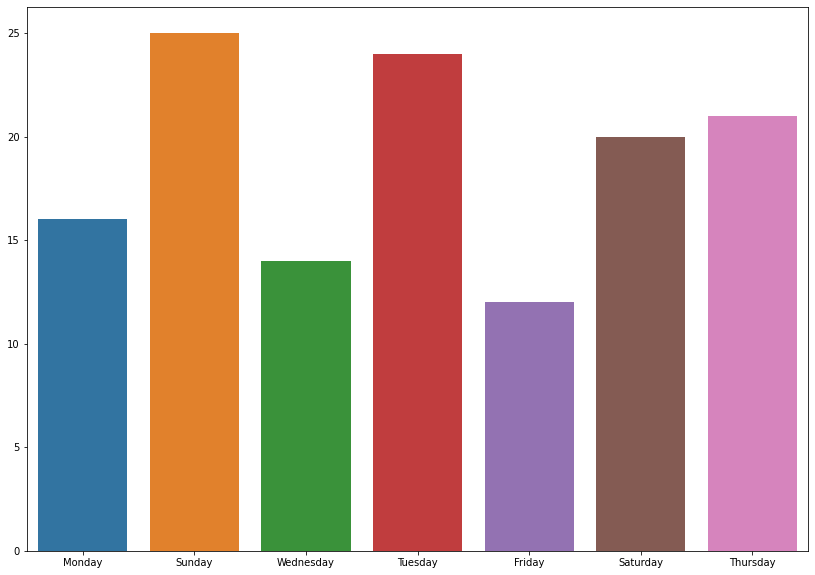

In [53]:
sns.barplot(x=df.weekday.value_counts().index, y=df.groupby(['weekday'])['id'].count().values)

In [54]:
df.groupby(['isRepost']).agg({'id': "count"})

,id
isRepost,
False,93
True,39


In [55]:
df.groupby(['isRepost']).agg({'id': "count"})['id']

isRepost
False    93
True     39
Name: id, dtype: int64

In [56]:
sns.set_theme()
sns.set_palette("husl")

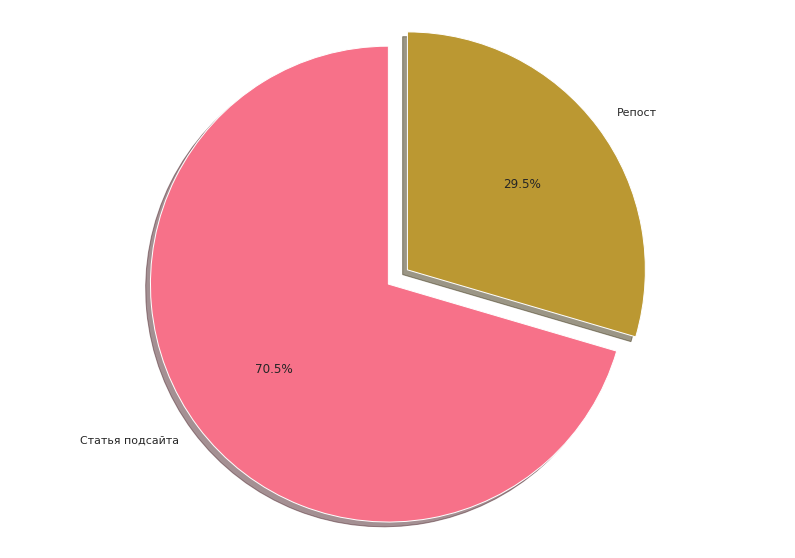

In [57]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Статья подсайта', 'Репост'
sizes = df.groupby(['isRepost']).agg({'id': "count"})['id'].values
explode = (0, 0.1)  # выпирающий кусок пирога

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  
plt.show()

<AxesSubplot:xlabel='symbols'>

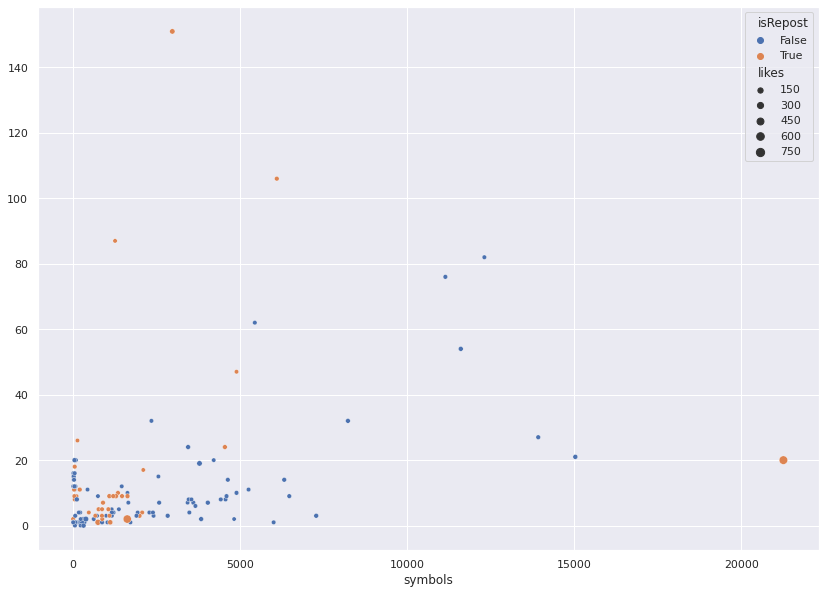

In [58]:
sns.set_theme()
sns.color_palette()

sns.scatterplot(x=df.symbols, size=df.likes, hue='isRepost', 
                y=sum([df.images, df.videos, df.links]), data=df)

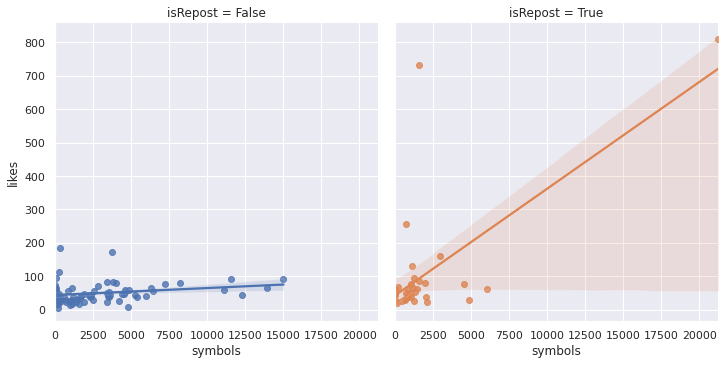

In [59]:
sns.lmplot(data=df, x='symbols', y='likes', col='isRepost', hue='isRepost')

In [60]:
sum((df.isRepost == True) / len(df.isRepost))

0.29545454545454525

In [61]:
tmp = df.groupby(['author_name'])['author_name'].count().sort_values(ascending=False).head(10)

In [62]:
tmp

author_name
Dark CyMPAK                      60
Suzume-sama said OKawaii Koto     9
Япония                            4
Александр Слепичев                4
Азиз Нишанов                      4
Паша Сенько                       3
Михаил Архипов                    3
Путешествия                       3
Ayan Myrzagali                    2
Руслан Бициев                     2
Name: author_name, dtype: int64

https://stackoverflow.com/questions/49820549/labeling-horizontal-barplot-with-values-in-seaborn

https://stackoverflow.com/questions/45946970/displaying-of-values-on-barchart

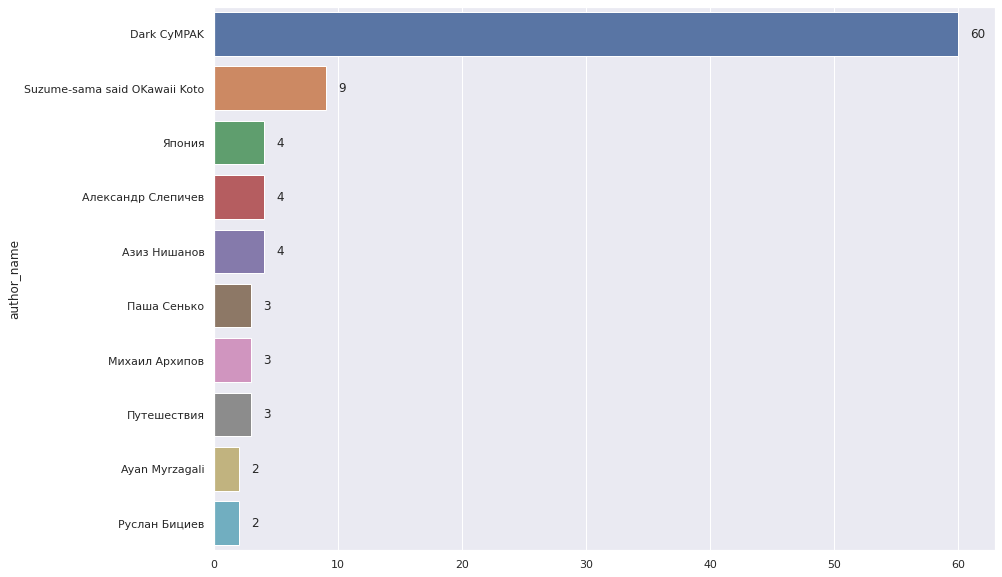

In [63]:
f = sns.barplot(x=tmp.values, y=tmp.index)
ax = f
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment

In [64]:
df.groupby(['author_name']).agg({'id': 'count', 'likes': ['max', 'sum']}).sort_values(by=("id",'count'), ascending=False)

id likes      
                              count   max   sum
author_name                                    
Dark CyMPAK                      60    92  2577
Suzume-sama said OKawaii Koto     9    95   503
Япония                            4   185   345
Александр Слепичев                4    92   222
Азиз Нишанов                      4    55   165
Паша Сенько                       3    64   157
Михаил Архипов                    3    71   107
Путешествия                       3    62   140
Ayan Myrzagali                    2   113   187
Руслан Бициев                     2    78   139
Анимемания                        2   131   215
Merci Beaku                       2    54   105
Аskar K                           2    61    92
Константин Мельников              2   172   252
Даня Мешковец                     2    84   127
Данил Спарков                     1    17    17
Вячеслав Екимов                   1    42    42
Виабу                             1    47    47
Антон Самитов                     1   731   731
Дмитрий Шамов                     1    58    58
Кандибобер на голове.             1    60    60
Александр Николаев                1    63    63
Милые животные                    1    47    47
9Dill                             1     6     6
spacedust                         1   256   256
KekW                              1    80    80
Crunchyroll                       1   809   809
Cyberpunk 2077                    1   162   162
Denis Kasyanchuk                  1    57    57
Digo                              1    46    46
Dmitry Davydov                    1    52    52
Godo Dazai                        1    23    23
Just No Chill                     1    25    25
Klech97                           1    60    60
mindtered                         1    51    51
Layben                            1    44    44
Marshal_New_Arleana               1    47    47
Saher                             1    19    19
Screenshit                        1    30    30
Serhii Nesterov                   1    38    38
Vladimir Saenko                   1    67    67
Wonderful Semen                   1    29    29
likesimulator                     1    44    44

In [65]:
df.columns

Index(['id', 'url', 'author', 'commentsCount', 'favoritesCount', 'hitsCount',
       'isRepost', 'likes', 'subsite', 'title', 'type', 'repost',
       'stackedRepostsAuthors', 'blocks', 'media_content_types', 'author_name',
       'author_type', 'symbols', 'words', 'images', 'videos', 'links',
       'hashtags', 'exotic_media_type', 'hour', 'weekday', 'is_weekend'],
      dtype='object')

<AxesSubplot:>

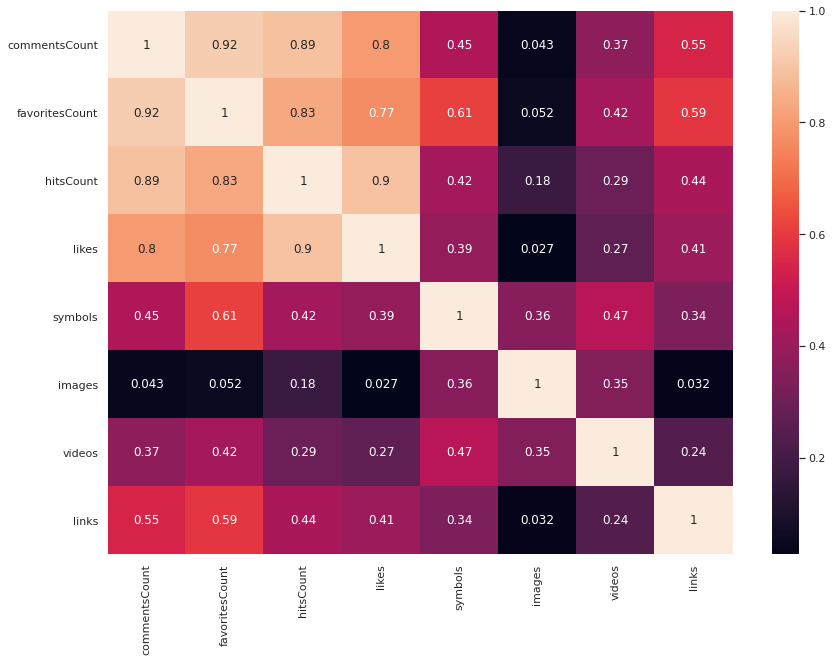

In [66]:
sns.heatmap(df.loc[:, ['commentsCount', 'favoritesCount', 'hitsCount', 
                       'likes', 'symbols', 'images', 'videos', 'links']].corr(), annot=True)

In [67]:
df.groupby(['author_name', 'isRepost']).agg({'id': 'count', 'likes': ['max', 'sum']}).sort_values(by=("id",'count'), ascending=False)

id likes      
                                       count   max   sum
author_name                   isRepost                  
Dark CyMPAK                   False       54    92  2326
Suzume-sama said OKawaii Koto True         9    95   503
Dark CyMPAK                   True         6    78   251
Япония                        False        4   185   345
Александр Слепичев            False        4    92   222
Азиз Нишанов                  False        4    55   165
Паша Сенько                   False        3    64   157
Путешествия                   True         3    62   140
Михаил Архипов                False        3    71   107
Аskar K                       False        2    61    92
Ayan Myrzagali                False        2   113   187
Руслан Бициев                 True         2    78   139
Merci Beaku                   True         2    54   105
Константин Мельников          False        2   172   252
Даня Мешковец                 False        2    84   127
Данил Спарков                 False        1    17    17
Вячеслав Екимов               False        1    42    42
Дмитрий Шамов                 False        1    58    58
Виабу                         False        1    47    47
Антон Самитов                 True         1   731   731
Анимемания                    True         1   131   131
Кандибобер на голове.         True         1    60    60
Анимемания                    False        1    84    84
Милые животные                True         1    47    47
Александр Николаев            True         1    63    63
9Dill                         False        1     6     6
spacedust                     True         1   256   256
KekW                          True         1    80    80
Crunchyroll                   True         1   809   809
Cyberpunk 2077                True         1   162   162
Denis Kasyanchuk              False        1    57    57
Digo                          True         1    46    46
Dmitry Davydov                False        1    52    52
Godo Dazai                    False        1    23    23
Just No Chill                 True         1    25    25
Klech97                       False        1    60    60
mindtered                     True         1    51    51
Layben                        True         1    44    44
Marshal_New_Arleana           False        1    47    47
Saher                         True         1    19    19
Screenshit                    True         1    30    30
Serhii Nesterov               True         1    38    38
Vladimir Saenko               True         1    67    67
Wonderful Semen               False        1    29    29
likesimulator                 False        1    44    44

<AxesSubplot:xlabel='symbols'>

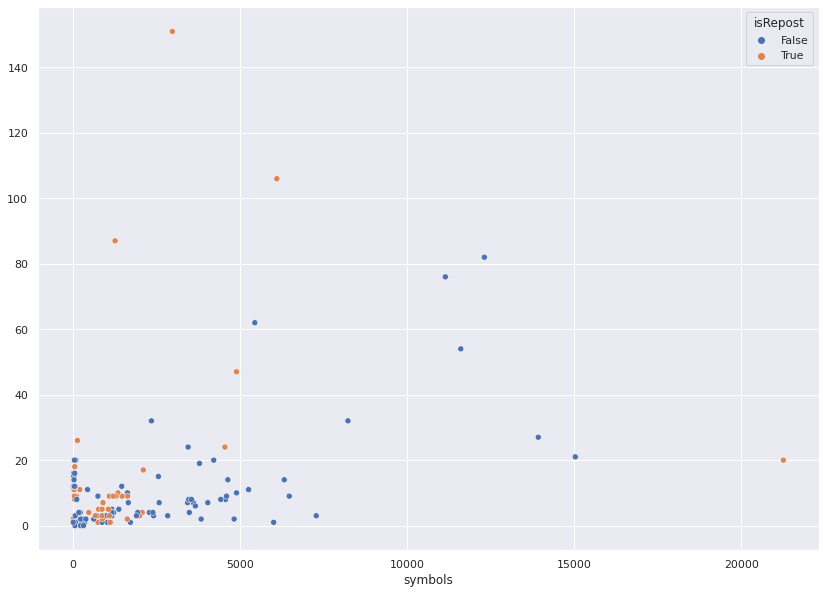

In [68]:
sns.scatterplot(x=df.symbols, y=sum([df.images, df.videos, df.links]), hue='isRepost', data=df)

<AxesSubplot:xlabel='commentsCount', ylabel='Count'>

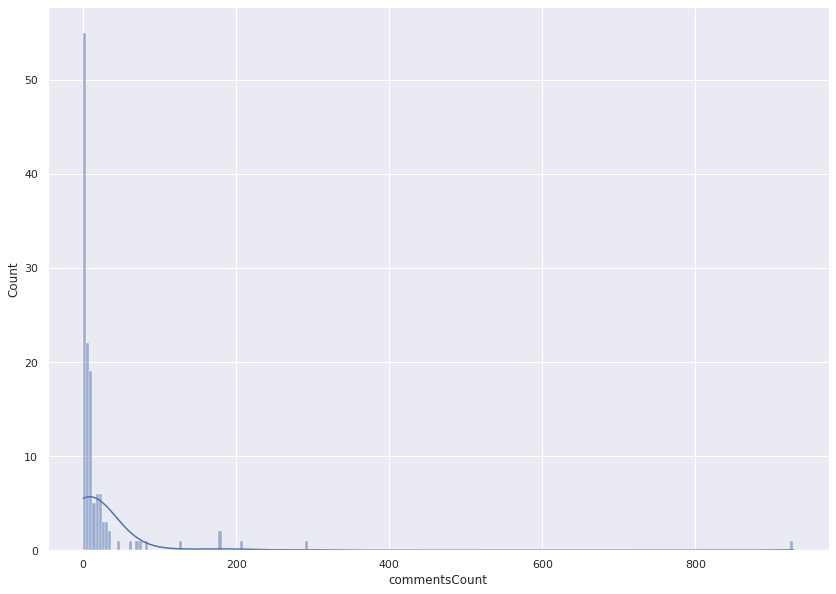

In [69]:
sns.histplot(x = df.commentsCount, kde=True)

<AxesSubplot:xlabel='likes', ylabel='Count'>

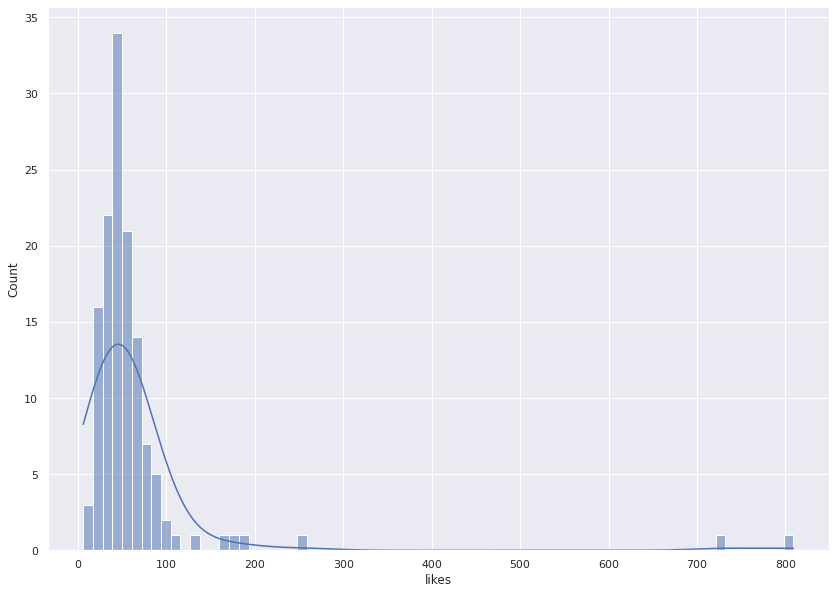

In [70]:
sns.histplot(df.likes, kde=True)

<AxesSubplot:xlabel='isRepost', ylabel='likes'>

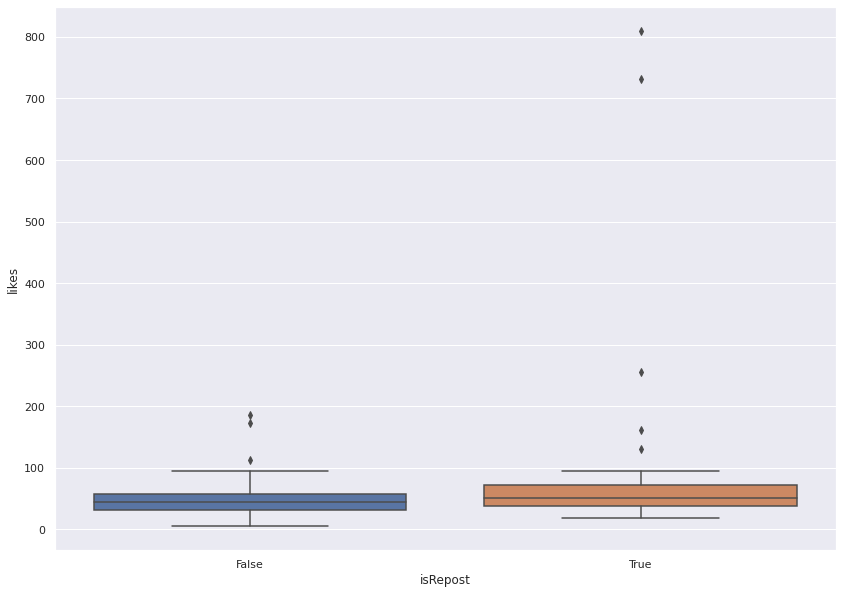

In [71]:
sns.boxplot(data=df, x="isRepost", y="likes")

In [72]:
a = df.groupby(['author_name']).agg({'id': 'count'})
a[a['id'] > 1].sort_values(by='id', ascending=False)

,id
author_name,
Dark CyMPAK,60
Suzume-sama said OKawaii Koto,9
Азиз Нишанов,4
Александр Слепичев,4
Япония,4
Михаил Архипов,3
Паша Сенько,3
Путешествия,3
Ayan Myrzagali,2


In [73]:
a[a['id'] > 1].index

Index(['Ayan Myrzagali', 'Dark CyMPAK', 'Merci Beaku',
       'Suzume-sama said OKawaii Koto', 'Аskar K', 'Азиз Нишанов',
       'Александр Слепичев', 'Анимемания', 'Даня Мешковец',
       'Константин Мельников', 'Михаил Архипов', 'Паша Сенько', 'Путешествия',
       'Руслан Бициев', 'Япония'],
      dtype='object', name='author_name')

In [74]:
tmp = df.groupby(['author_name']).agg({'id': 'count'})

<AxesSubplot:xlabel='likes', ylabel='author_name'>

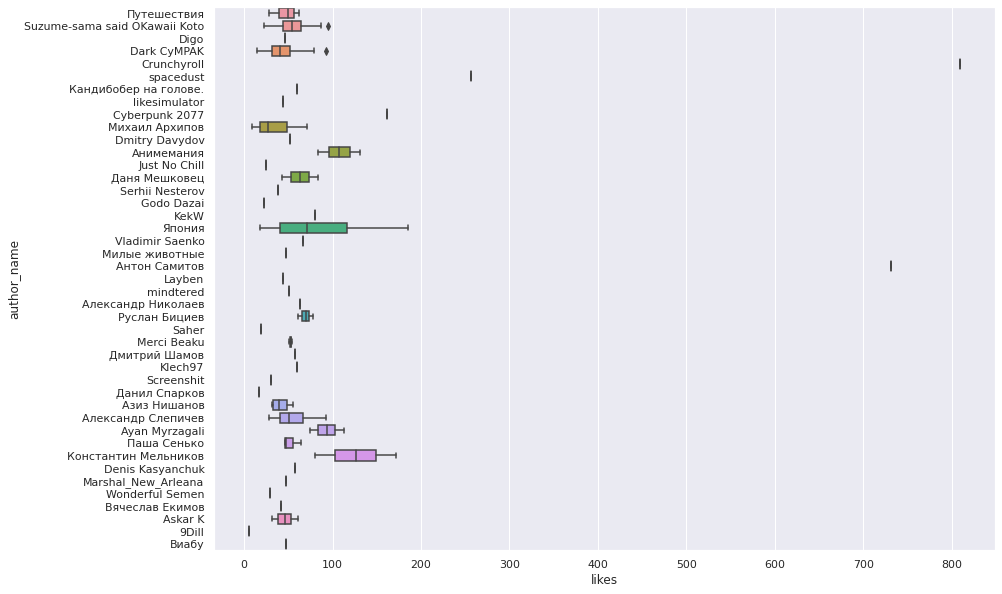

In [75]:
sns.boxplot(data=df, y="author_name", x="likes")

<AxesSubplot:ylabel='likes'>

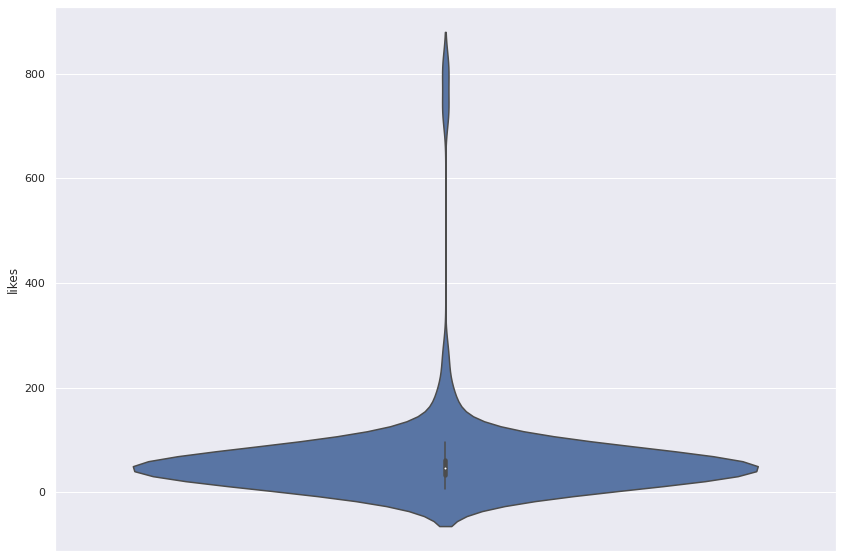

In [76]:
sns.violinplot(y=df.likes)

In [77]:
from plotnine import *
from plotnine.data import *

https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_violin.html?highlight=violin#violins-boxes-points-and-lines

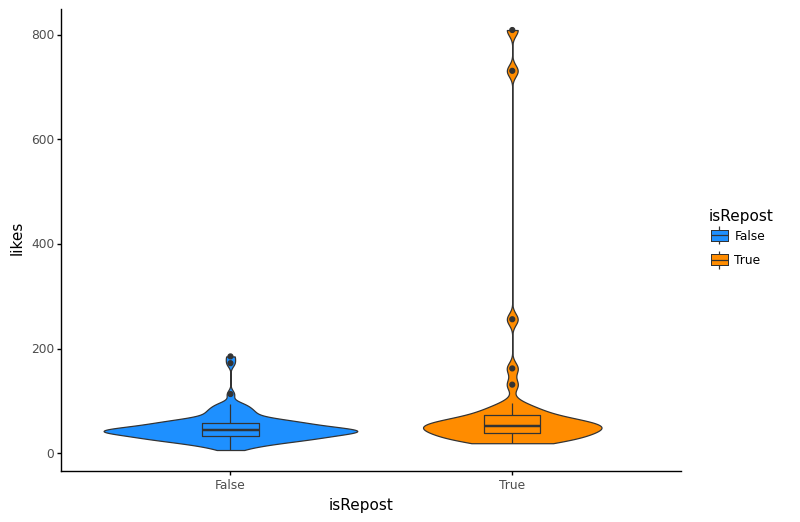

<ggplot: (8728549429158)>

In [78]:
(ggplot(df, aes(x=df.isRepost, y=df.likes, fill=df.isRepost)) + geom_violin(show_legend=False) + geom_boxplot(width = .2)
+ scale_fill_manual(values=['dodgerblue', 'darkorange'])
+ theme_classic()
+ theme(figure_size=(8, 6))
)

In [79]:
subs = pd.read_csv(PATH + "data_test_subs_jp.csv", index_col=0)
subs

,id,url,author,badges,commentsCount,commentsSeenCount,favoritesCount,cover,date,dateRFC,...,is_show_thanks,is_still_updating,is_filled_by_editors,isEditorial,audioUrl,hotness,commentEditor,summarize,repost,stackedRepostsAuthors
0,655467,https://dtf.ru/s/japan/655467-bolshe-gasyapono...,"{'id': 27850, 'url': 'https://dtf.ru/u/27850-d...","[{'type': 'top', 'text': 'Япония', 'background...",2,NaN,5,"{'additionalData': {'size': 576727, 'type': 'j...",1614351266,"Fri, 26 Feb 2021 17:54:26 +0300",...,False,False,False,False,NaN,0,{'enabled': True},Bandai Namco’s Gashapon Department Store в Ике...,NaN,NaN
1,653734,https://dtf.ru/s/japan/653734-festival-fudzi-s...,"{'id': 27850, 'url': 'https://dtf.ru/u/27850-d...","[{'type': 'top', 'text': 'Япония', 'background...",1,NaN,6,"{'additionalData': {'size': 534138, 'type': 'j...",1614265081,"Thu, 25 Feb 2021 17:58:01 +0300",...,False,False,False,False,NaN,0,{'enabled': True},40 минут на автобусе от станции Кавагутико на ...,NaN,NaN
2,650909,https://dtf.ru/s/travel/650909-10-potryasayush...,"{'id': 329335, 'url': 'https://dtf.ru/s/travel...","[{'type': 'top', 'text': 'Путешествия', 'backg...",5,NaN,18,"{'additionalData': {'size': 182666, 'type': 'j...",1613986578,"Mon, 22 Feb 2021 12:36:18 +0300",...,False,False,False,False,NaN,0,{'enabled': True},Музей открыт ежедневно и находится в постройке...,"{'author': {'id': 300374, 'url': 'https://dtf....",[]
3,651835,https://dtf.ru/s/weaboo/651835-some-japan,"{'id': 124435, 'url': 'https://dtf.ru/u/124435...","[{'type': 'top', 'text': 'Виабу', 'background'...",9,NaN,14,"{'additionalData': {'size': 1351208, 'type': '...",1614061795,"Tue, 23 Feb 2021 09:29:55 +0300",...,False,False,False,False,NaN,0,{'enabled': True},"Адрес: 605-4 Mawatari Onuma, Хитачинака 312-00...","{'author': {'id': 300374, 'url': 'https://dtf....",[]
4,646467,https://dtf.ru/u/286845-digo/646467,"{'id': 286845, 'url': 'https://dtf.ru/u/286845...","[{'type': 'top', 'text': 'Digo', 'background':...",19,NaN,15,"{'additionalData': {'size': 890999, 'type': 'j...",1613630419,"Thu, 18 Feb 2021 09:40:19 +0300",...,False,False,False,False,NaN,0,{'enabled': True},#наэтотразбезhorny #фотография #япония #токио,"{'author': {'id': 300374, 'url': 'https://dtf....",[]
0,645864,https://dtf.ru/s/japan/645864-sady-hamarikyu,"{'id': 27850, 'url': 'https://dtf.ru/u/27850-d...","[{'type': 'top', 'text': 'Япония', 'background...",0,NaN,13,"{'additionalData': {'size': 283350, 'type': 'j...",1613578168,"Wed, 17 Feb 2021 19:09:28 +0300",...,False,False,False,False,NaN,0,{'enabled': True},Токийский залив обеспечивает соленой водой ров...,NaN,NaN
1,634735,https://dtf.ru/anime/634735-v-anime-devushka-n...,"{'id': 256351, 'url': 'https://dtf.ru/crunchyr...","[{'type': 'top', 'text': 'Аниме', 'background'...",945,NaN,793,"{'additionalData': {'size': 86706, 'type': 'jp...",1613495808,"Tue, 16 Feb 2021 20:16:48 +0300",...,False,False,False,False,https://leonardo.osnova.io/audio/a6cb09cd-a825...,0,{'enabled': True},"То, что происходит в Японии, происходит и в др...","{'author': {'id': 300374, 'url': 'https://dtf....",[]
2,641673,https://dtf.ru/life/641673-v-yaponii-naznachen...,"{'id': 22393, 'url': 'https://dtf.ru/u/22393-s...","[{'type': 'top', 'text': 'Жизнь', 'background'...",292,NaN,86,"{'additionalData': {'size': 62267, 'type': 'gi...",1613242692,"Sat, 13 Feb 2021 21:58:12 +0300",...,False,False,False,False,NaN,0,{'enabled': True},В Японии министра по региональному развитию Тэ...,"{'author': {'id': 300374, 'url': 'https://dtf....",[]
3,641437,https://dtf.ru/flood/641437-v-yaponii-zemletry...,"{'id': 314019, 'url': 'https://dtf.ru/u/314019...","[{'type': 'top', 'text': 'Офтоп', 'background'...",63,NaN,18,NaN,1613228476,"Sat, 13 Feb 2021 18:01:16 +0300",...,False,False,False,False,NaN,0,{'enabled': True},NaN,"{'author': {'id': 300374, 'url': 'https://dtf....",[]
4,641304,https://dtf.ru/s/japan/641304-sovety-turistu-c...,"{'id': 27850, 'url': 'https://dtf.ru/u/27850-d...","[{'type': 'top', 'text': 'Япония', 'b

In [80]:
subs.title

0                      Больше гасяпонов богу гасяпонов
1                          Фестиваль Фудзи Сиба-сакура
2    10 потрясающих музеев, посвященных еде и напиткам
3                                          _some:Japan
4                                                  NaN
0                                        Сады Хамарикю
1    В аниме «Девушка напрокат» парень платит девуш...
2       В Японии назначен министр по делам одиночества
3          В Японии землетрясение магнитудой 7,2 балла
4    Советы туристу: что взять в Японию в разные се...
0                Бамбуковый лес Сагано в Киото, Япония
1                     Национальный парк Хитачи, Япония
2                                         Это не аниме
3                                                  NaN
4    ( ͡° ͜ʖ ͡°) Интересный музей в префектуре Тоти...
Name: title, dtype: object

In [81]:
subs = pd.read_csv(PATH + "data_test_subset_weeaboo.csv", index_col=0)
subs

,id,url,author,badges,commentsCount,commentsSeenCount,favoritesCount,cover,date,dateRFC,...,is_show_thanks,is_still_updating,is_filled_by_editors,isEditorial,audioUrl,hotness,commentEditor,summarize,repost,stackedRepostsAuthors
0,652505,https://dtf.ru/s/weaboo/652505-glavnaya-devoch...,"{'id': 261696, 'url': 'https://dtf.ru/s/weaboo...","[{'type': 'top', 'text': 'Виабу', 'background'...",31,NaN,5,"{'additionalData': {'size': 255539, 'type': 'p...",1614231819,"Thu, 25 Feb 2021 08:43:39 +0300",...,False,False,False,False,NaN,0,{'enabled': True},"Несмотря на то, что Маёй выглядит как младшекл...",NaN,NaN
1,656373,https://dtf.ru/s/weaboo/656373-rasp-33-podbork...,"{'id': 262818, 'url': 'https://dtf.ru/u/262818...","[{'type': 'top', 'text': 'Виабу', 'background'...",0,NaN,1,"{'additionalData': {'size': 354581, 'type': 'j...",1614435131,"Sat, 27 Feb 2021 17:12:11 +0300",...,False,False,False,False,NaN,0,{'enabled': True},Автор: #rasp #nsfw,NaN,NaN
2,656284,https://dtf.ru/u/169967-just-no-chill/656284-s...,"{'id': 169967, 'url': 'https://dtf.ru/u/169967...","[{'type': 'top', 'text': 'Just No Chill', 'bac...",12,NaN,2,"{'additionalData': {'size': 316243, 'type': 'p...",1614426885,"Sat, 27 Feb 2021 14:54:45 +0300",...,False,False,False,False,NaN,0,{'enabled': True},"17.02.21 Soviet Games выложили пост, в котором...","{'author': {'id': 261696, 'url': 'https://dtf....",[]
3,656272,https://dtf.ru/s/weaboo/656272,"{'id': 46404, 'url': 'https://dtf.ru/u/46404-o...","[{'type': 'top', 'text': 'Виабу', 'background'...",7,NaN,3,"{'additionalData': {'size': 89782, 'type': 'jp...",1614425322,"Sat, 27 Feb 2021 14:28:42 +0300",...,False,False,False,False,NaN,0,{'enabled': True},#виабу #мемы,NaN,NaN
4,656238,https://dtf.ru/s/weaboo/656238-soglasny,"{'id': 154947, 'url': 'https://dtf.ru/u/154947...","[{'type': 'top', 'text': 'Виабу', 'background'...",9,NaN,7,"{'additionalData': {'size': 4486490, 'type': '...",1614422110,"Sat, 27 Feb 2021 13:35:10 +0300",...,False,False,False,False,NaN,0,{'enabled': True},Узнали?,NaN,NaN
5,656231,https://dtf.ru/s/weaboo/656231-kollab-goda,"{'id': 154947, 'url': 'https://dtf.ru/u/154947...","[{'type': 'top', 'text': 'Виабу', 'background'...",2,NaN,1,"{'additionalData': {'size': 231238, 'type': 'j...",1614421058,"Sat, 27 Feb 2021 13:17:38 +0300",...,False,False,False,False,NaN,0,{'enabled': True},NaN,NaN,NaN
0,656186,https://dtf.ru/s/weaboo/656186,"{'id': 212847, 'url': 'https://dtf.ru/u/212847...","[{'type': 'top', 'text': 'Виабу', 'background'...",3,NaN,6,"{'additionalData': {'size': 644270, 'type': 'g...",1614418248,"Sat, 27 Feb 2021 12:30:48 +0300",...,False,False,False,False,NaN,0,{'enabled': True},NaN,NaN,NaN
1,656100,https://dtf.ru/s/weaboo/656100,"{'id': 154947, 'url': 'https://dtf.ru/u/154947...","[{'type': 'top', 'text': 'Виабу', 'background'...",8,NaN,5,"{'additionalData': {'size': 130090, 'type': 'j...",1614411676,"Sat, 27 Feb 2021 10:41:16 +0300",...,False,False,False,False,NaN,0,{'enabled': True},NaN,NaN,NaN
2,656075,https://dtf.ru/s/weaboo/656075-dobrochay-i-vku...,"{'id': 123828, 'url': 'https://dtf.ru/u/123828...","[{'type': 'top', 'text': 'Виабу', 'background'...",5,NaN,8,"{'additionalData': {'size': 246037, 'type': 'j...",1614410444,"Sat, 27 Feb 2021 10:20:44 +0300",...,False,False,False,False,NaN,0,{'enabled': True},"Чаи, произведенные по этой технологии, отличаю...",NaN,NaN
3,656048,https://dtf.ru/s/weaboo/656048-imeni-samoy-mil...,"{'id': 264881, 'url': 'https://dtf.ru/u/264881...","[{'type': 'top', 'text': 'Виабу', 'background'...",8,NaN,8,"{'additionalData': {'size': 1042953, 'type': '...",1614409399,"Sat, 27 Feb 2021 10:03:19 +0300",...,False,False,False,False,NaN,0,{'enabled': True},Не забудьте отдать свой голос за Мисаку в голо...,NaN,NaN
